In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\ml\California Housing\housing.csv")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\user\AppData\Local\Temp\ipykernel_7760\3765669127.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\ml\California Housing\housing.csv")


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
median_bedrooms = df['total_bedrooms'].median()
df["total_bedrooms"].fillna(median_bedrooms, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7760\3089209330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [14]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

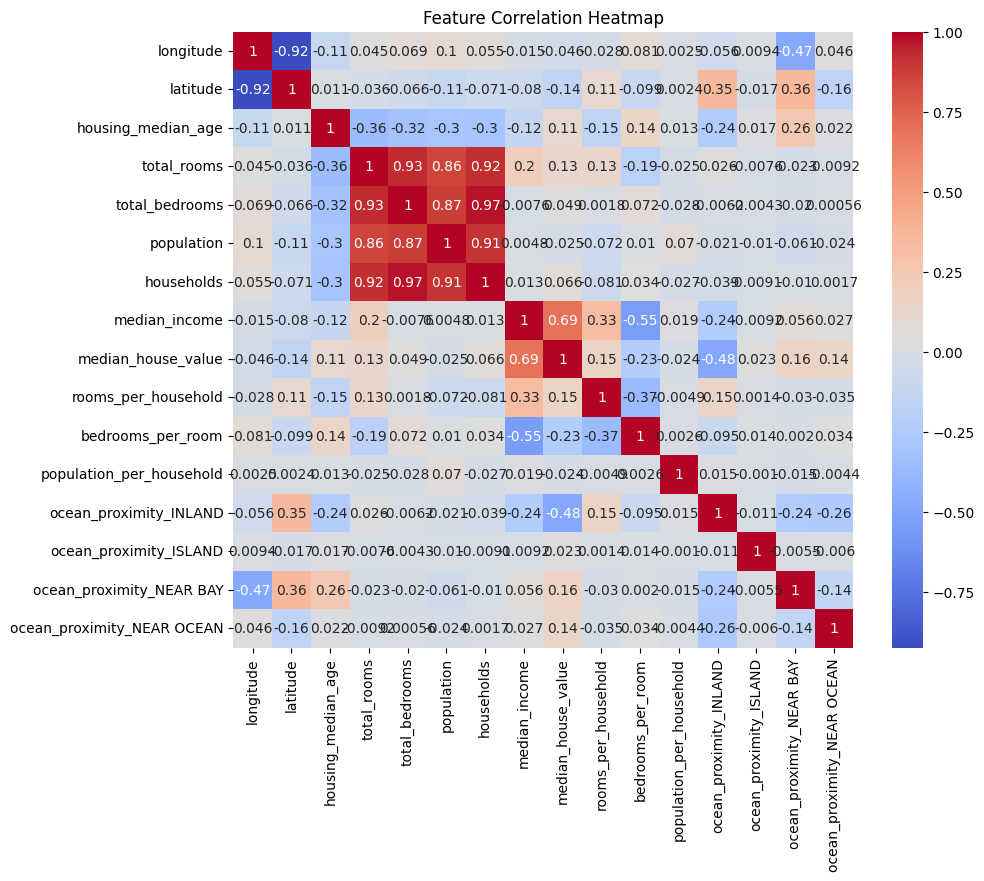

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


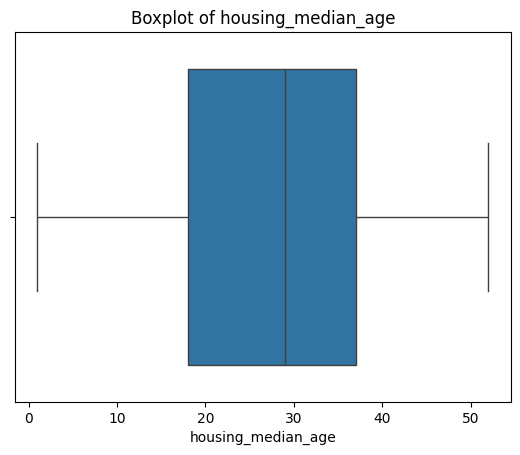

In [16]:
sns.boxplot(x=df['housing_median_age'])
plt.title('Boxplot of housing_median_age')    
plt.show()


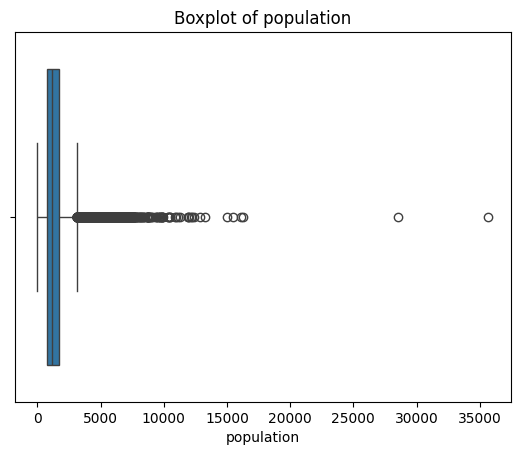

In [17]:
sns.boxplot(x=df['population'])
plt.title('Boxplot of population')
plt.show()


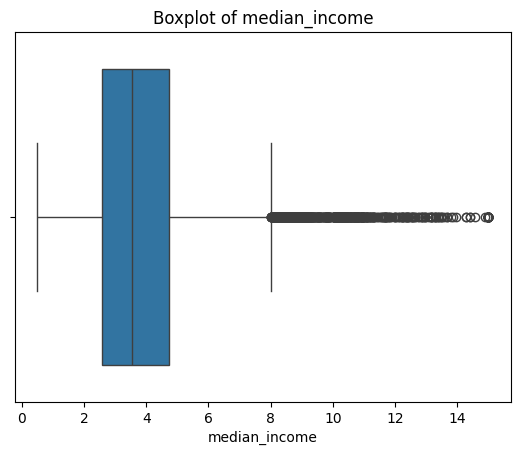

In [18]:
sns.boxplot(x=df['median_income'])
plt.title('Boxplot of median_income')    
plt.show()

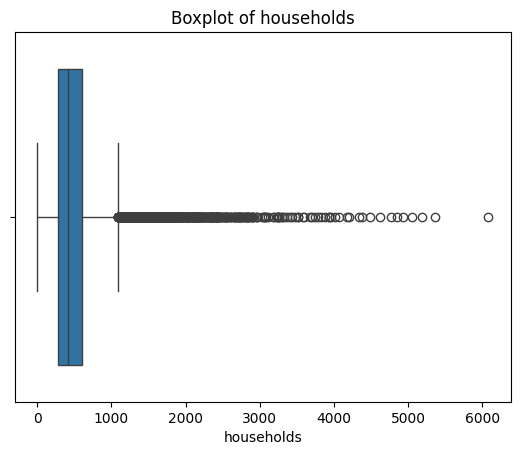

In [24]:
sns.boxplot(x=df['households'])
plt.title('Boxplot of households')    
plt.show()

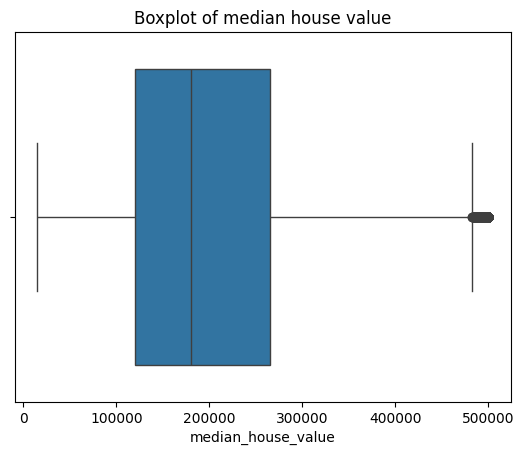

In [23]:
sns.boxplot(x=df['median_house_value'])
plt.title('Boxplot of median house value')    
plt.show()

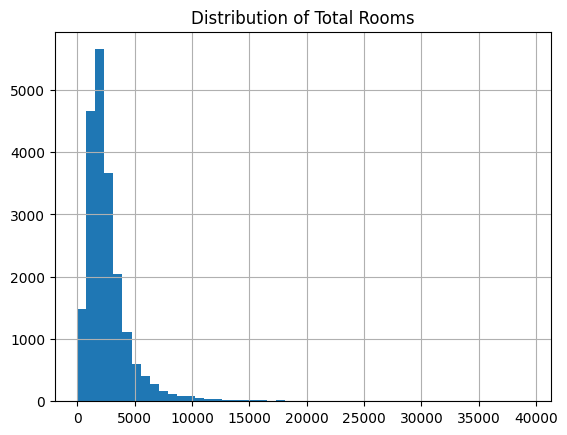

In [20]:
df['total_rooms'].hist(bins=50)
plt.title('Distribution of Total Rooms')
plt.show()

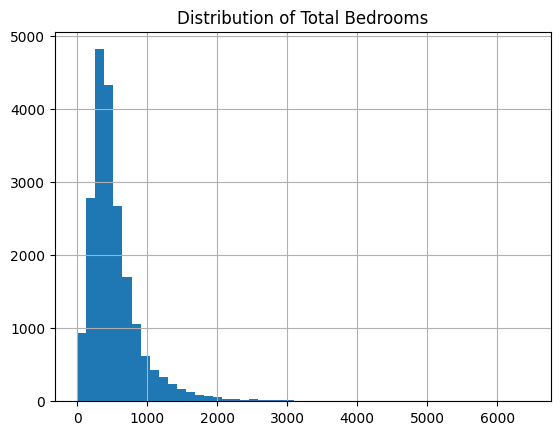

In [25]:
df['total_bedrooms'].hist(bins=50)
plt.title('Distribution of Total Bedrooms')
plt.show()

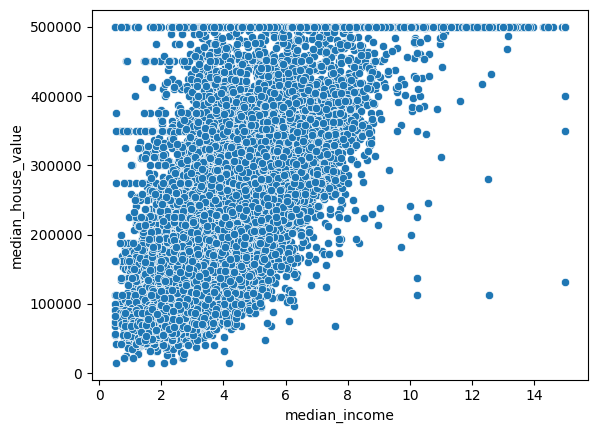

In [21]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.show()


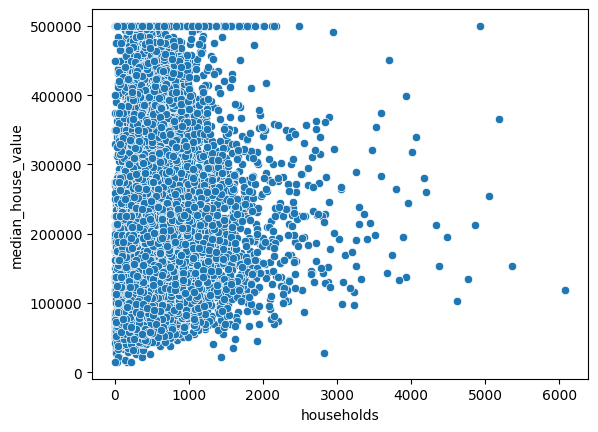

In [26]:
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.show()

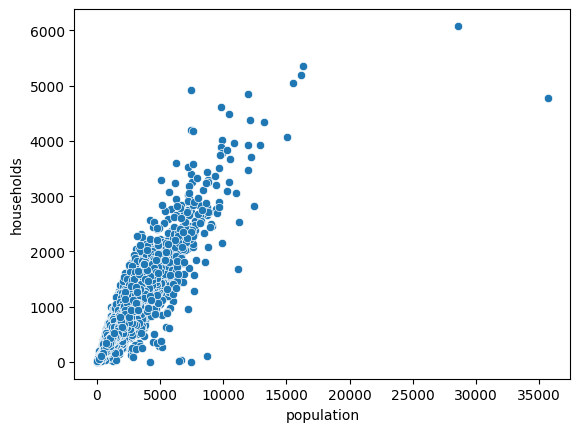

In [27]:
sns.scatterplot(x='population', y='households', data=df)
plt.show()

In [28]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

cols_with_outliers = ['population', 'median_income', 'households', 'median_house_value']
df = remove_outliers_iqr(df, cols_with_outliers)


In [39]:
outlier_cols = ['population', 'households', 'median_income', 'median_house_value']

for col in outlier_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col + '_capped'] = df[col].clip(lower=lower, upper=upper)

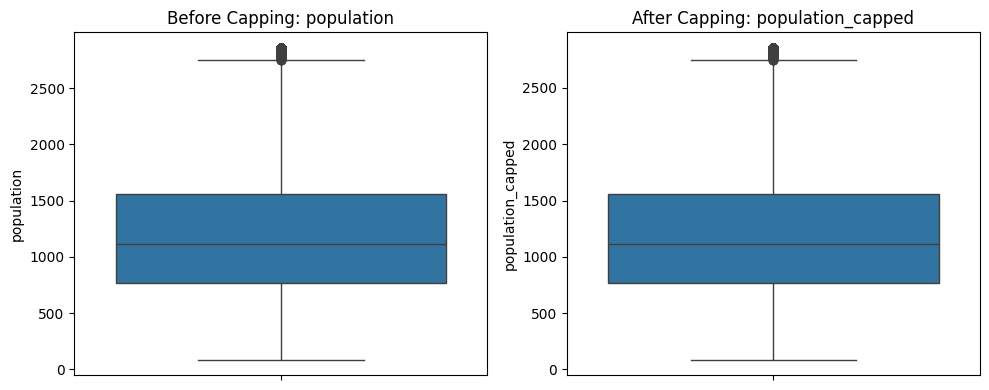

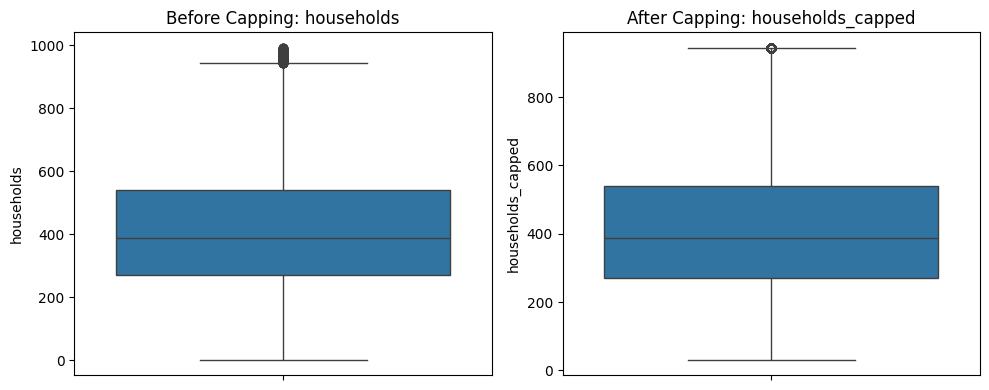

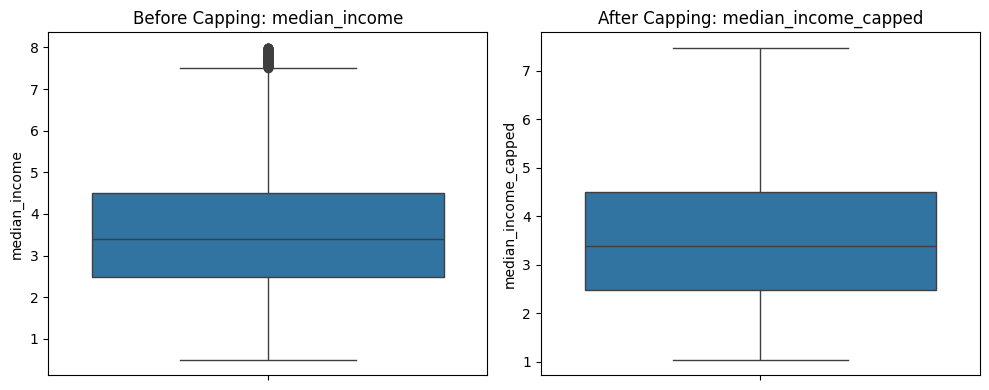

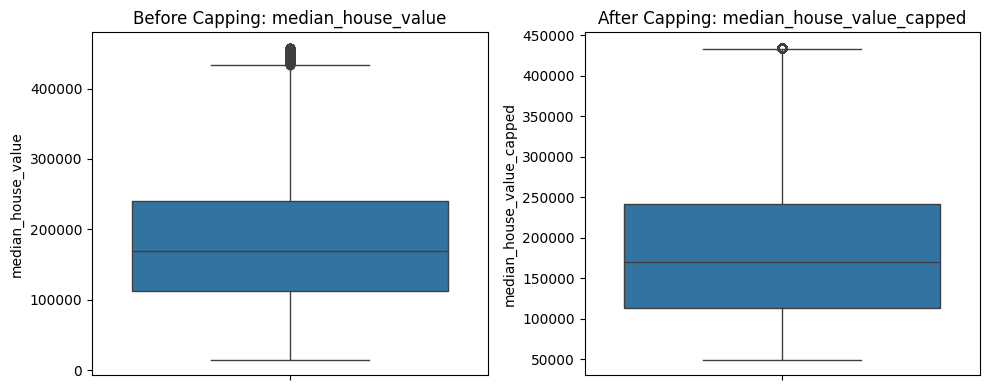

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

capped_cols = ['population', 'households', 'median_income', 'median_house_value']

for col in capped_cols:
    plt.figure(figsize=(10, 4))

    # Before and After boxplots
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'Before Capping: {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col + '_capped'])
    plt.title(f'After Capping: {col}_capped')

    plt.tight_layout()
    plt.show()


In [41]:
cols = ['population', 'households', 'median_house_value']

for col in cols:
    upper_cap = df[col].quantile(0.95)
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])

In [50]:
df.drop(columns=['population_capped', 'households_capped', 'median_income_capped', 'median_house_value_capped'], inplace=True)

In [52]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [54]:
df1 = df.copy()

df1 = df1.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)
df = df.drop(columns=['rooms_per_household', 'bedrooms_per_room', 'population_per_household'], axis=1)

Model Building on the Normal Dataframe

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y =df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.4f}")

MAE: 39321.04
MSE: 2653788395.04
R2: 0.6529


In [62]:
coeffs = pd.Series(lr.coef_, index=X_train.columns)
print(coeffs.sort_values(ascending=False))


ocean_proximity_ISLAND        118829.685110
median_income                  71958.761791
households                     37828.296167
total_bedrooms                 28725.496297
housing_median_age             13104.735342
ocean_proximity_NEAR OCEAN     -4253.443099
ocean_proximity_NEAR BAY      -10869.981143
total_rooms                   -12968.986563
ocean_proximity_INLAND        -37715.818324
population                    -50395.592932
latitude                      -86479.007315
longitude                     -90406.498370
dtype: float64


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.4f}")

MAE: 26492.63
MSE: 1454365723.96
R2: 0.8098


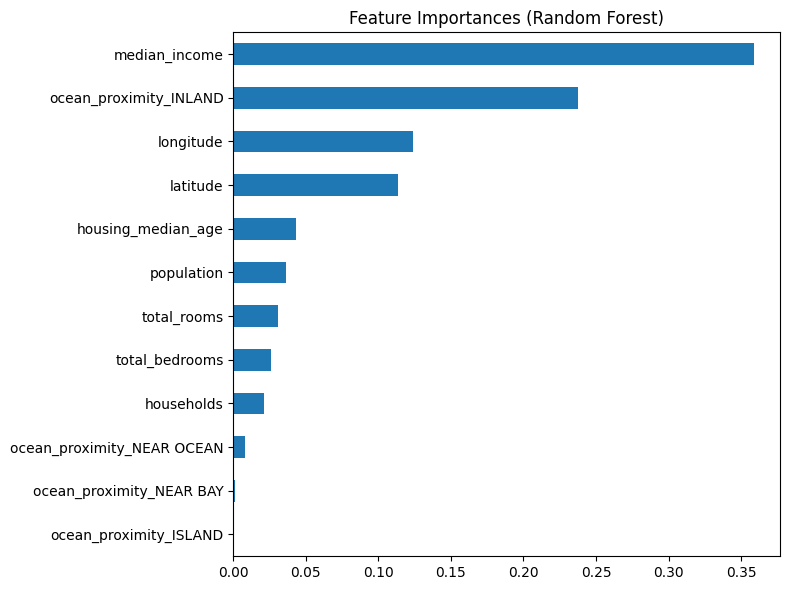

In [60]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [77]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [78]:
rfr = RandomForestRegressor(random_state=42)

rcv = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rcv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
39 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\user\AppData\Roaming\Python\Pyt

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [80]:
best_rfr = rcv.best_estimator_

y_pred = best_rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned RF MAE: {mae:.2f}")
print(f"Tuned RF R²: {r2:.4f}")

Tuned RF MAE: 27742.30
Tuned RF R²: 0.8026


In [82]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    sub_sample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost R²: {r2:.4f}")

XGBoost MAE: 26151.78
XGBoost R²: 0.8163


In [86]:
from sklearn.model_selection import GridSearchCV

params_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=params_gird,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"Best XGBoost MAE: {mae_xgb:.2f}")
print(f"Best XGBoost R²: {r2_xgb:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best XGBoost MAE: 24894.02
Best XGBoost R²: 0.8266


Model Buliding on Feature Engineered DataFrame


In [87]:
X = df1.drop('median_house_value', axis=1)
y =df1['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.4f}")

MAE: 40028.75
MSE: 2737471653.62
R2: 0.6419


In [90]:
coeffs = pd.Series(lr.coef_, index=X_train.columns)
print(coeffs.sort_values(ascending=False))


ocean_proximity_ISLAND        123151.086254
median_income                  73203.585074
housing_median_age             10880.615560
bedrooms_per_room              10461.415982
rooms_per_household             2743.272504
ocean_proximity_NEAR OCEAN      1711.547785
ocean_proximity_NEAR BAY       -5110.603146
population_per_household       -9666.713014
ocean_proximity_INLAND        -36481.698972
latitude                      -85135.856828
longitude                     -90436.160094
dtype: float64


In [92]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.4f}")

MAE: 26350.15
MSE: 1496875417.06
R2: 0.8042


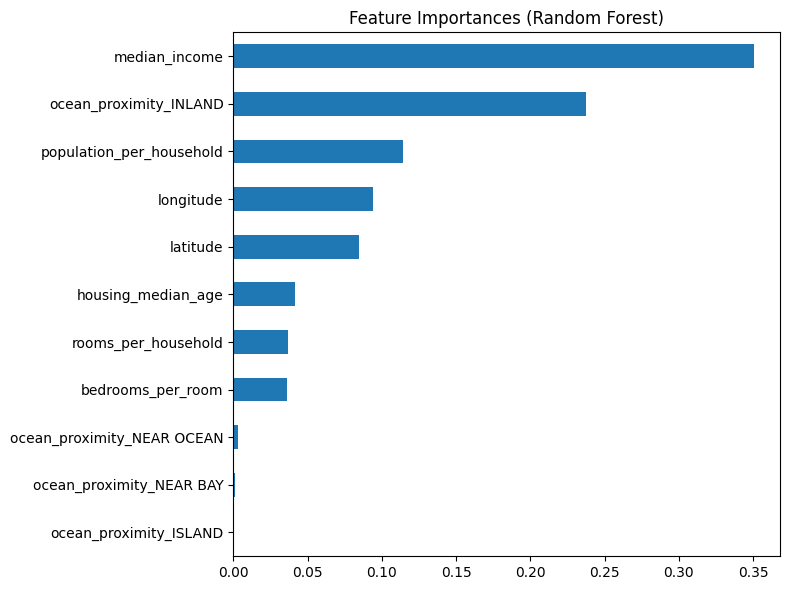

In [93]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [94]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
rfr = RandomForestRegressor(random_state=42)

rcv = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rcv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
39 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\user\AppData\Roaming\Python\Pyt

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [96]:
best_rfr = rcv.best_estimator_

y_pred = best_rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned RF MAE: {mae:.2f}")
print(f"Tuned RF R²: {r2:.4f}")

Tuned RF MAE: 26057.59
Tuned RF R²: 0.8155


In [97]:
xgb = XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    sub_sample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost R²: {r2:.4f}")

XGBoost MAE: 25553.45
XGBoost R²: 0.8200


In [98]:
params_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=params_gird,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"Best XGBoost MAE: {mae_xgb:.2f}")
print(f"Best XGBoost R²: {r2_xgb:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best XGBoost MAE: 23946.59
Best XGBoost R²: 0.8379
